### Simple Linear Regression

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
import pandas as pd
df = pd.read_csv("50_Startups.csv")
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.shape

(50, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


#### PROFIT ~ RND

In [9]:
X = df[["RND"]]

In [10]:
X.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [11]:
Y = df[["PROFIT"]]
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


### Visualize PROFIT VS RND

In [12]:
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'RND VS PROFIT')

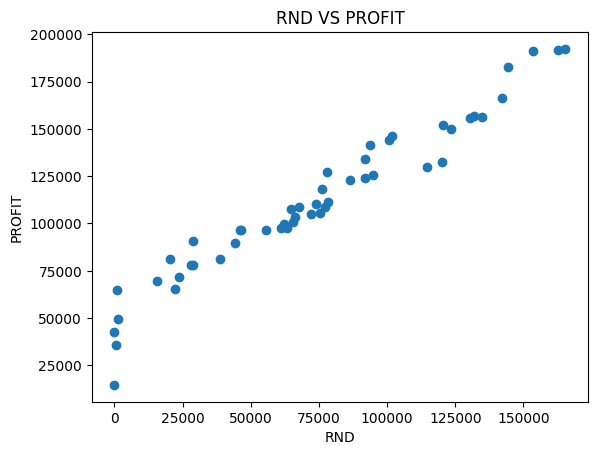

In [15]:
plt.scatter(df['RND'],df['PROFIT'])
plt.xlabel('RND')
plt.ylabel('PROFIT')
plt.title('RND VS PROFIT')

### Model Building

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
model = LinearRegression()

In [18]:
model.fit(X,Y)

LinearRegression()

In [20]:
model.intercept_

array([49032.89914125])

In [21]:
model.coef_

array([[0.85429137]])

~~~
PROFIT = B0+B1*RND
B0 = 49032.90
B1 = 0.8543
~~~

### Predicted values of X

In [25]:
ypred =model.predict(X)
ypred

array([[190289.29389289],
       [187938.71118575],
       [180116.65707807],
       [172369.00320589],
       [170433.97345032],
       [161694.19683741],
       [164033.72501421],
       [160345.46724972],
       [152011.33380847],
       [154396.82286103],
       [136096.36397105],
       [135036.08586475],
       [129219.89081021],
       [127621.20411029],
       [151499.37407569],
       [146869.43093301],
       [115678.82583435],
       [129897.69412683],
       [127413.41482014],
       [122860.50313037],
       [114175.91374003],
       [116000.34693472],
       [112245.81324567],
       [106725.35677792],
       [114850.93206678],
       [104275.40289851],
       [113385.70276482],
       [110633.79960036],
       [105460.14271464],
       [105079.09459155],
       [101994.24845109],
       [101261.18102569],
       [103202.54108032],
       [ 96440.90176556],
       [ 88694.29012885],
       [ 88342.27936946],
       [ 73520.10196791],
       [ 86681.47714396],
       [ 663

In [26]:
Y

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94
5,156991.12
6,156122.51
7,155752.60
8,152211.77
9,149759.96


### Evaluate your model

In [28]:
## R2 score
model.score(X,Y)

0.9465353160804393

In [34]:
### Getting MSE, RMSE, MAE
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [35]:
mse = mean_squared_error(Y,ypred)
rmse = mse **(1/2)
mae = mean_absolute_error(Y,ypred)
r2 = r2_score(Y,ypred)
print('::::results::::')
print('MSE : ',mse)
print('RMSE : ',rmse)
print('R2 : ', r2)

::::results::::
MSE :  85120931.32706906
RMSE :  9226.100548285232
R2 :  0.9465353160804393


### Visualize the regression plot

In [36]:
import seaborn as sb

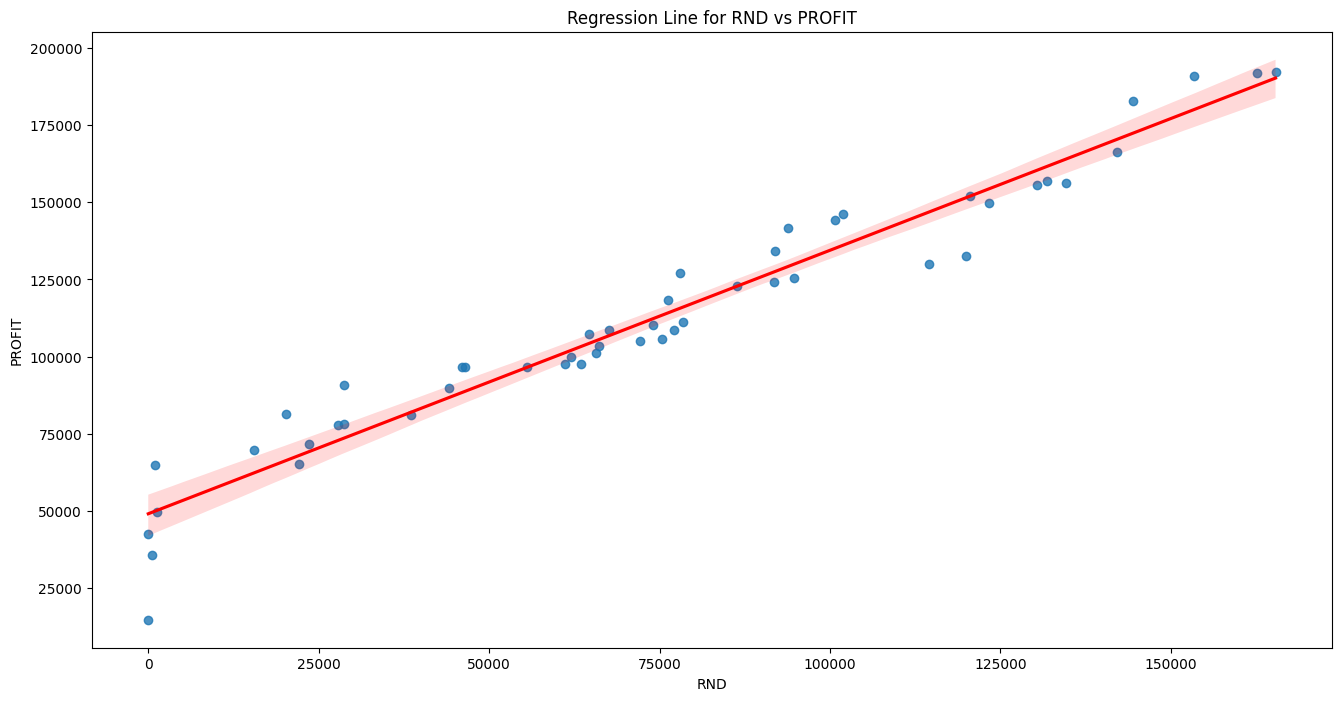

In [38]:
plt.figure(figsize=(16,8))
sb.regplot(data=df,x='RND',y='PROFIT',line_kws={'color':'red'})
plt.title('Regression Line for RND vs PROFIT')
plt.show()

### Application of Model

In [41]:
rnd = [[80000]]
profit_pred = model.predict(rnd)
profit_pred

array([[117376.20881636]])